# FACTORS AFFECTING ATTRITION

## Problem Statement : 
   Exploratory Data Analysis (EDA) on the given Attrition data set for finding the factors that might affect the attrition  

In [1]:
# Importing libraries required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the csv file
attrition = pd.read_csv("attrition.csv")

In [3]:
# Reading the attrition.csv file
attrition

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [4]:
#Getting the number of rows and columns 
attrition.shape

(1470, 20)

In [5]:
#Column name and data types of all the columns
attrition.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
OverTime                   object
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
DistanceFromHome            int64
dtype: object

In [6]:
#Observing the sample variables and entities of the data set
attrition.sample(5)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
997,27,1,Travel_Rarely,Research & Development,Life Sciences,4,Female,3,1,3,Single,2394,Yes,8,3,8,2,7,7,17
1138,50,0,Travel_Frequently,Research & Development,Medical,2,Male,3,4,3,Married,11245,Yes,32,3,30,8,12,13,20
179,38,0,Travel_Rarely,Research & Development,Life Sciences,3,Female,3,1,4,Single,2288,No,2,3,2,2,2,1,9
381,30,0,Travel_Rarely,Sales,Technical Degree,3,Male,3,1,2,Married,2476,No,1,3,1,0,0,0,2
498,22,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,3,Married,2773,No,3,3,2,2,2,2,6


Understanding the data into two types of variables       
1) Integer type Variables           
2) Object type Variables             

### Describing Integer type Variables

In [7]:
attrition.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


### Describing Object type Variables

In [8]:
#Describing categorical variable
attrition.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Married,No
freq,1043,961,606,882,673,1054


In [9]:
# Checking for null values
attrition.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DistanceFromHome           0
dtype: int64

In [10]:
# Checking for data duplication
attrition.duplicated().sum()

0

In [11]:
#Analysing the data of those employees who left the company out of overall employees
a = attrition.loc[(attrition.Attrition == 1),:]
a

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
14,28,1,Travel_Rarely,Research & Development,Life Sciences,3,Male,2,1,3,Single,2028,Yes,6,3,4,2,0,3,24
21,36,1,Travel_Rarely,Sales,Life Sciences,3,Male,2,1,1,Single,3407,No,10,3,5,3,0,3,9
24,34,1,Travel_Rarely,Research & Development,Medical,2,Male,3,1,1,Single,2960,No,8,3,4,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,Sales,Marketing,4,Male,3,1,1,Married,1790,No,1,2,1,0,1,0,9
1442,29,1,Travel_Rarely,Research & Development,Medical,1,Male,3,1,4,Married,4787,Yes,4,4,2,2,2,2,1
1444,56,1,Travel_Rarely,Research & Development,Technical Degree,4,Male,3,1,3,Married,2339,No,14,1,10,9,9,8,7
1452,50,1,Travel_Frequently,Sales,Life Sciences,2,Male,3,2,3,Divorced,6728,No,12,3,6,3,0,1,1


In [12]:
a.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,2.464135,2.518987,1.637131,2.468354,4787.092827,8.244726,2.658228,5.130802,2.902954,1.945148,2.852321,10.632911
std,9.689350,0.0,1.169791,0.773405,0.940594,1.118058,3640.210367,7.169204,0.816453,5.949984,3.174827,3.153077,3.143349,8.452525
min,18.000000,1.0,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.0,1.000000,2.000000,1.000000,1.000000,2373.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,32.000000,1.0,3.000000,3.000000,1.000000,3.000000,3202.000000,7.000000,3.000000,3.000000,2.000000,1.000000,2.000000,9.000000
75%,39.000000,1.0,4.000000,3.000000,2.000000,3.000000,5916.000000,10.000000,3.000000,7.000000,4.000000,2.000000,5.000000,17.000000
max,58.000000,1.0,4.000000,4.000000,5.000000,4.000000,19859.000000,40.000000,4.000000,40.000000,15.000000,15.000000,14.000000,29.000000


In [13]:
#Analysing the data of those employees who are working in the company out of overall employees
b = attrition.loc[(attrition.Attrition == 0),:]
b

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
5,32,0,Travel_Frequently,Research & Development,Life Sciences,4,Male,3,1,4,Single,3068,No,8,2,7,7,3,6,2
6,59,0,Travel_Rarely,Research & Development,Medical,3,Female,4,1,1,Married,2670,Yes,12,2,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [14]:
b.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,2.771290,2.770479,2.145985,2.778589,6832.739659,11.862936,2.781022,7.369019,4.484185,2.234388,4.367397,8.915653
std,8.888360,0.0,1.071132,0.692050,1.117933,1.093277,4818.208001,7.760719,0.681907,6.096298,3.649402,3.234762,3.594116,8.012633
min,18.000000,0.0,1.000000,1.000000,1.000000,1.000000,1051.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,31.000000,0.0,2.000000,2.000000,1.000000,2.000000,3211.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.0,3.000000,3.000000,2.000000,3.000000,5204.000000,10.000000,3.000000,6.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.0,4.000000,3.000000,3.000000,4.000000,8834.000000,16.000000,3.000000,10.000000,7.000000,3.000000,7.000000,13.000000
max,60.000000,0.0,4.000000,4.000000,5.000000,4.000000,19999.000000,38.000000,4.000000,37.000000,18.000000,15.000000,17.000000,29.000000


Basic Observations of the given Data set:  

1)Our Target variable / Label - Attrition has two values,0 - staying in the company(No attrition),1 - Leaving the company(Attrition)   
2)The total size of the data set is 1470 rows x 20 Columns    
3)The given data set is having composition of both 'int' type variables and 'object' type variables. Out of the total variables, there are 14 integer variables and 6 object type variables.    
4)There are no Null values and duplicate values in the dataset   

Under our analysis of the given data set, Describing Integer type Variables:

1) Age:                
The average age of all the employees is little less than 37.     
The variance of age about the mean is nearly 9.      
The minimum age of employee is 18.      
Around 367 out of 1470 employees are having age less than 30.50% of the employees i.e., 735 employees are having age less than 36, Remaining 735 employees having age greater than 36.    
Around 367 out of 1470 employees are having age greater than 43. While the maximum age of employees being 60.

2) Monthly Income:   
The average monthly income of all the employees is nearly 6503.   
The variance of monthly income about the mean is nearly 4707.   
The lowest monthly income of all the employees is 1009.   
Around 367 out of 1470 employees are having monthly income less than 2911. 
50% of the employees i.e., 735 employees are having monthly income less than 4919, Remaining 735 employees having monthly income greater than 4919.    
Around 367 out of 1470 employees are having monthly income greater than 8379. While the maximum age of employees being 19999.

3) Total Working Years:   
The average Total Working Years of all the employees is nearly 11.   
The variance of Total Working Years about the mean is nearly 8.   
The lowest Total Working Years of all the employees is 0.   
Around 367 out of 1470 employees are having Total Working Years less than 6. 
50% of the employees i.e., 735 employees are having Total Working Years less than 10, Remaining 735 employees having Total Working Years greater than 10.    
Around 367 out of 1470 employees are having Total Working Years greater than 15. While the maximum Total Working Years of employees being 40.

4) Years at Company:
The average Years at Company of all the employees is nearly 7.   
The variance of Years at Company about the mean is nearly 6.   
The lowest Years at Company of all the employees is 0.   
Around 367 out of 1470 employees are having Years at Company less than 3. 
50% of the employees i.e., 735 employees are having Years at Company less than 5, Remaining 735 employees having Years at Company greater than 5.    
Around 367 out of 1470 employees are having Years at Company greater than 9. While the maximum Years at Company of employees being 40.  

5) Years in Current Role:   
The average Years in Current Role of all the employees is nearly 4.   
The variance of Years in Current Role about the mean is nearly 3.5.   
The lowest Years in Current Role of all the employees is 0.   
Around 367 out of 1470 employees are having Years in Current Role less than 2. 
50% of the employees i.e., 735 employees are having Years in Current Role less than 3, Remaining 735 employees having Years in Current Role greater than 3.    
Around 367 out of 1470 employees are having Years in Current Role greater than 7. While the maximum Years in Current Role of employees being 18.  


6) Years since last promotion    
The average Years since last promotion of all the employees is nearly 2.   
The variance of Years since last promotion about the mean is nearly 3.   
The lowest Years since last promotion of all the employees is 0.   
Around 367 out of 1470 employees are having Years since last promotion less than 0. 
50% of the employees i.e., 735 employees are having Years since last promotion less than 1, Remaining 735 employees having Years since last promotion greater than 1.    
Around 367 out of 1470 employees are having Years since last promotion greater than 3. While the maximum Years since last promotion of employees being 15. 

7) Years with Current Manager     
The average Years with Current Manager of all the employees is nearly 4.   
The variance of Years with Current Manager about the mean is nearly 3.5.   
The lowest Years with Current Manager of all the employees is 0.   
Around 367 out of 1470 employees are having Years with Current Manager less than 2. 
50% of the employees i.e., 735 employees are having Years with Current Manager less than 3, Remaining 735 employees having Years with Current Manager greater than 3.    
Around 367 out of 1470 employees are having Years with Current Manager greater than 7. While the maximum Years with Current Manager of employees being 17. 

8) Distance From Home          
The average Distance From Home of all the employees is nearly 9.   
The variance of Distance From Home about the mean is nearly 8.   
The lowest Distance From Home of all the employees is 1.   
Around 367 out of 1470 employees are having Distance From Home less than 2. 
50% of the employees i.e., 735 employees are having Distance From Home less than 7, Remaining 735 employees having Distance From Home greater than 7.    
Around 367 out of 1470 employees are having Distance From Home greater than 14. While the maximum Distance From Home of employees being 29.


The describe() method gives the 8 point summary of the descriptive statistics   
It is for all the numerical variables in the data     

1. Age

In [15]:
attrition[['Attrition','Age']].groupby(['Attrition']).describe()

Age                                                  
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
0          1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
1           237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

<AxesSubplot:xlabel='Age', ylabel='Density'>

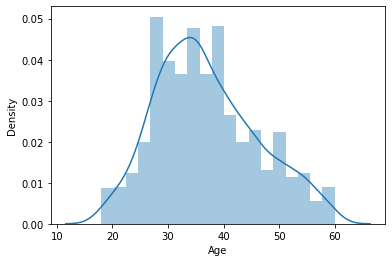

In [16]:
sns.distplot(attrition['Age'], kde=True) 

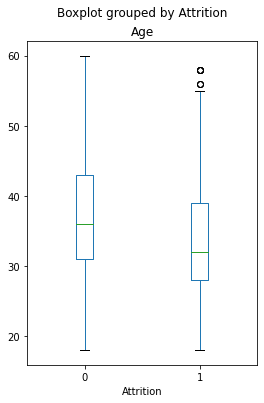

In [17]:
attrition.boxplot(column="Age", grid=False,by="Attrition",figsize=(4,6))
plt.show()

1) Age:   
-The average age of employees leaving the company is nearly 33.while the minimum and maximum ages of the employees leaving the company are 18 and 58 respectively.      
-The mean age of employees is slightly greater than median.so the distribution can be approximated as normally distributed.     
-Around 50% of the employees leaving the company are having age less than 32. It implies that attrition is significant in younger people.    
 


2.MonthlyIncome

In [18]:
attrition[['Attrition','MonthlyIncome']].groupby(['Attrition']).describe()

MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
0                1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
1                 237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                            
              75%      max  
Attrition                   
0          8834.0  19999.0  
1          5916.0  19859.0

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

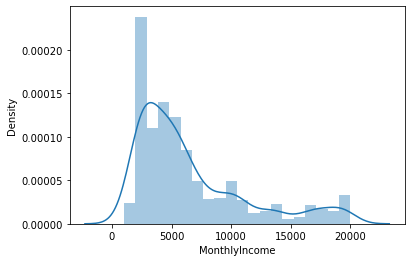

In [19]:
sns.distplot(attrition['MonthlyIncome'], kde=True)

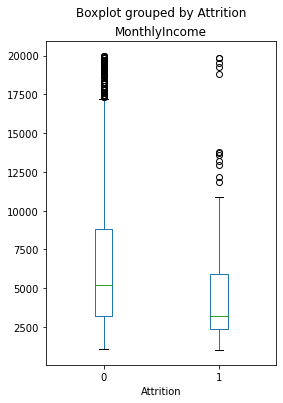

In [20]:
attrition.boxplot(column="MonthlyIncome", grid=False,by="Attrition",figsize=(4,6))
plt.show()

2) Monthly Income:   
-The average monthly income of employees leaving the company is nearly 4787. While the lowest monthly income of the employee leaving the company is 1009.     
-The mean monthly income of all the employees is greater than the median which means that the distribution is positively skewed.  
-Employee who earn less than mean are much more than employee who earn more than mean.  
-Most of the employees are earning low salary. The reason for this might be the employees at lower job level are more. (This can be explode further)  


3.TotalWorkingYears

In [21]:
attrition[['Attrition','TotalWorkingYears']].groupby(['Attrition']).describe()

TotalWorkingYears                                                 
                      count       mean       std  min  25%   50%   75%   max
Attrition                                                                   
0                    1233.0  11.862936  7.760719  0.0  6.0  10.0  16.0  38.0
1                     237.0   8.244726  7.169204  0.0  3.0   7.0  10.0  40.0

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

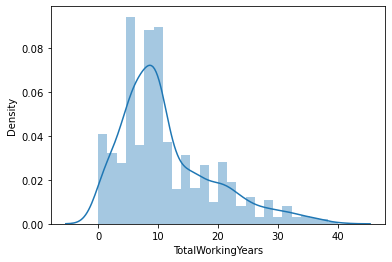

In [22]:
sns.distplot(attrition['TotalWorkingYears'], kde=True)

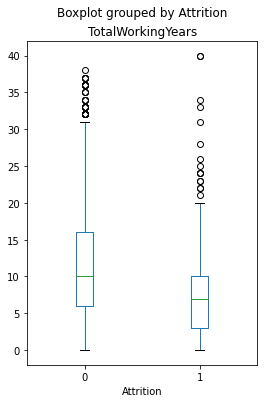

In [23]:
attrition.boxplot(column="TotalWorkingYears", grid=False,by="Attrition",figsize=(4,6))
plt.show()

3) Total Working Years:   
-The average Total Working Years of all the employees is nearly 11. While is is 7 years for employees leaving the company.  


4.YearsAtCompany

In [24]:
attrition[['Attrition','YearsAtCompany']].groupby(['Attrition']).describe()

YearsAtCompany                                               
                   count      mean       std  min  25%  50%   75%   max
Attrition                                                              
0                 1233.0  7.369019  6.096298  0.0  3.0  6.0  10.0  37.0
1                  237.0  5.130802  5.949984  0.0  1.0  3.0   7.0  40.0

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

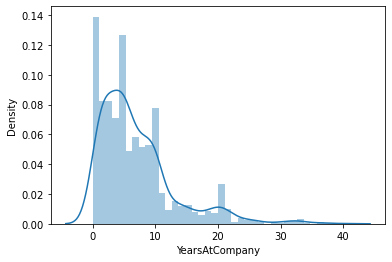

In [25]:
sns.distplot(attrition['YearsAtCompany'], kde=True)

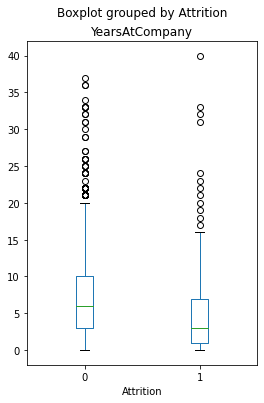

In [26]:
attrition.boxplot(column="YearsAtCompany", grid=False,by="Attrition",figsize=(4,6))
plt.show()

4) Years at Company:   
-The average Years at Company of all the employees is nearly 7.  
-Most people don't spend more than 10 years in this company.   
-75% of the employees leaving the company are spending less than 7 years in this company.   


5.YearsInCurrentRole

In [27]:
attrition[['Attrition','YearsInCurrentRole']].groupby(['Attrition']).describe()

YearsInCurrentRole                                              
                       count      mean       std  min  25%  50%  75%   max
Attrition                                                                 
0                     1233.0  4.484185  3.649402  0.0  2.0  3.0  7.0  18.0
1                      237.0  2.902954  3.174827  0.0  0.0  2.0  4.0  15.0

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

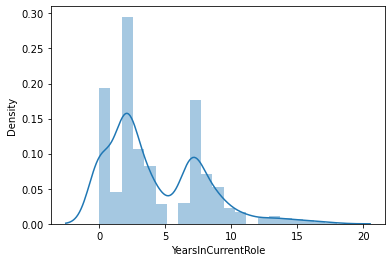

In [28]:
sns.distplot(attrition['YearsInCurrentRole'], kde=True)

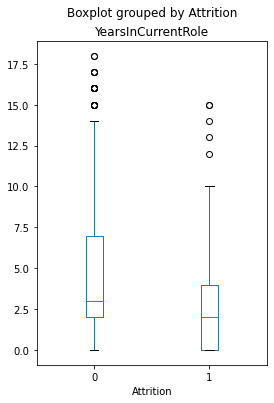

In [29]:
attrition.boxplot(column="YearsInCurrentRole", grid=False,by="Attrition",figsize=(4,6))
plt.show()

5) Years in Current Role:  
-The average Years in Current Role of all the employees is nearly 4.  
-75% of the employees leaving the company are spending typically 4 years in current role.  


6.YearsSinceLastPromotion

In [30]:
attrition[['Attrition','YearsSinceLastPromotion']].groupby(['Attrition']).describe()

YearsSinceLastPromotion                                          \
                            count      mean       std  min  25%  50%  75%   
Attrition                                                                   
0                          1233.0  2.234388  3.234762  0.0  0.0  1.0  3.0   
1                           237.0  1.945148  3.153077  0.0  0.0  1.0  2.0   

                 
            max  
Attrition        
0          15.0  
1          15.0

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

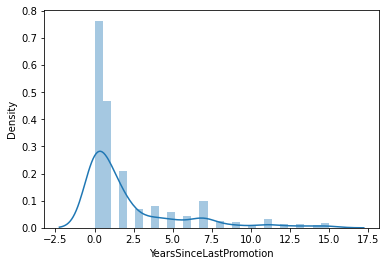

In [31]:
sns.distplot(attrition['YearsSinceLastPromotion'], kde=True)

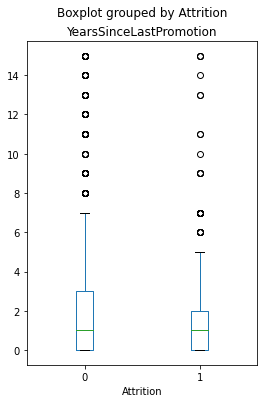

In [32]:
attrition.boxplot(column="YearsSinceLastPromotion", grid=False,by="Attrition",figsize=(4,6))
plt.show()

6)Years since last promotion:  
-The average Years since last promotion of all the employees is nearly 2.  
-Most of the employees got recently promoted i.e., last one year.  


7.YearsWithCurrManager

In [33]:
attrition[['Attrition','YearsWithCurrManager']].groupby(['Attrition']).describe()

YearsWithCurrManager                                              
                         count      mean       std  min  25%  50%  75%   max
Attrition                                                                   
0                       1233.0  4.367397  3.594116  0.0  2.0  3.0  7.0  17.0
1                        237.0  2.852321  3.143349  0.0  0.0  2.0  5.0  14.0

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

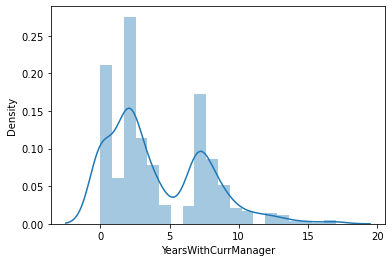

In [34]:
sns.distplot(attrition['YearsWithCurrManager'], kde=True)

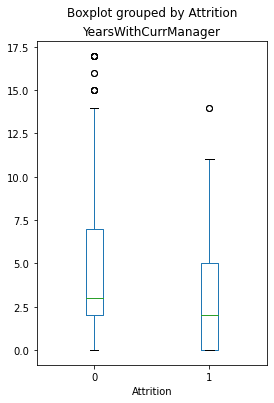

In [35]:
attrition.boxplot(column="YearsWithCurrManager", grid=False,by="Attrition",figsize=(4,6))
plt.show()

7) Years with Current Manager:  
-The average Years with Current Manager of all the employees is nearly 4.  

8.DistanceFromHome

In [36]:
attrition[['Attrition','DistanceFromHome']].groupby(['Attrition']).describe()

DistanceFromHome                                                
                     count       mean       std  min  25%  50%   75%   max
Attrition                                                                 
0                   1233.0   8.915653  8.012633  1.0  2.0  7.0  13.0  29.0
1                    237.0  10.632911  8.452525  1.0  3.0  9.0  17.0  29.0

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

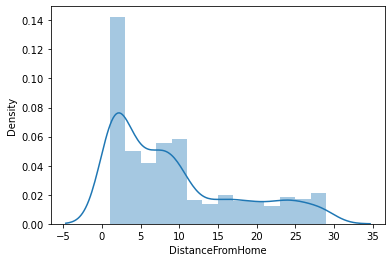

In [37]:
sns.distplot(attrition['DistanceFromHome'], kde=True)

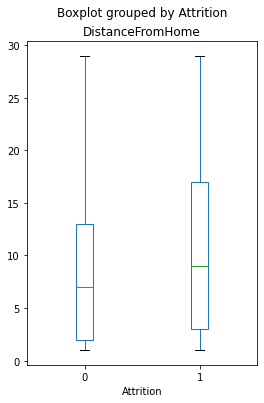

In [38]:
attrition.boxplot(column="DistanceFromHome", grid=False,by="Attrition",figsize=(4,6))
plt.show()

8) Distance From Home:  
-The average Distance From Home of all the employees is nearly 9.  
-The distribution is positively skewed.   
-From the distribution it can be infered that most of the employees stayed near to the office.  

### Categorical variables

### 9) EnvironmentSatisfaction

In [39]:
attrition[['Attrition','EnvironmentSatisfaction']].groupby(['Attrition']).describe()

EnvironmentSatisfaction                                             
                            count      mean       std  min  25%  50%  75%  max
Attrition                                                                     
0                          1233.0  2.771290  1.071132  1.0  2.0  3.0  4.0  4.0
1                           237.0  2.464135  1.169791  1.0  1.0  3.0  4.0  4.0

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

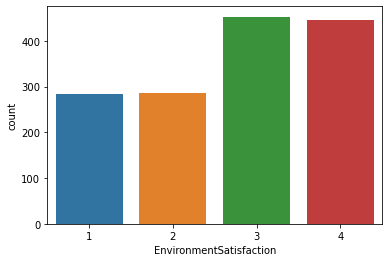

In [40]:
sns.countplot('EnvironmentSatisfaction',data=attrition)

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

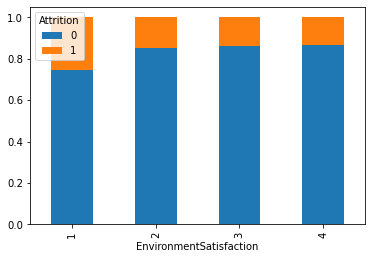

In [41]:
ct=pd.crosstab(attrition['EnvironmentSatisfaction'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [42]:
print('1)Total:',attrition['EnvironmentSatisfaction'].count(),'\n',attrition['EnvironmentSatisfaction'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.EnvironmentSatisfaction)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64 

2)table of joint proportion
 EnvironmentSatisfaction    1    2    3    4
Attrition                                  
0                        212  244  391  386
1                         72   43   62   60 

3)conditional probability conditioned on columns 
 EnvironmentSatisfaction         1         2         3         4
Attrition                                                      
0                        0.746479  0.850174  0.863135  0.865471
1                        0.253521  0.149826  0.136865  0.134529 

4)conditional probability conditioned on rows 
 EnvironmentSatisfaction         1         2         3         4
Attrition                                                      
0                        0.171938  0.197891  0.317113  0.313058
1                        0.303797  0.181435  0.261603  0.253165


-From the bar plot we can observe that around 60% of the employees are having higher environment satisfaction  i.e., levels 3 and 4.  
-Where as around 40% of the employees are having lower environment satisfaction i.e., levels 1 and 2.  


### 10) JobInvolvement

In [43]:
attrition[['Attrition','JobInvolvement']].groupby(['Attrition']).describe()

JobInvolvement                                             
                   count      mean       std  min  25%  50%  75%  max
Attrition                                                            
0                 1233.0  2.770479  0.692050  1.0  2.0  3.0  3.0  4.0
1                  237.0  2.518987  0.773405  1.0  2.0  3.0  3.0  4.0

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

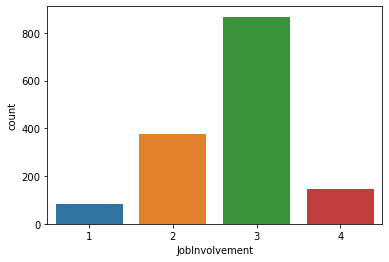

In [44]:
sns.countplot('JobInvolvement',data=attrition)

<AxesSubplot:xlabel='JobInvolvement'>

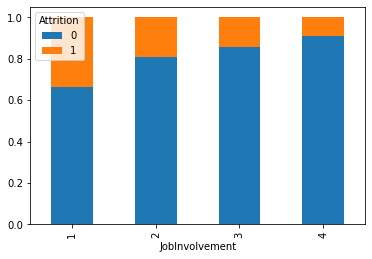

In [45]:
ct=pd.crosstab(attrition['JobInvolvement'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [46]:
print('1)Total:',attrition['JobInvolvement'].count(),'\n',attrition['JobInvolvement'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.JobInvolvement)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64 

2)table of joint proportion
 JobInvolvement   1    2    3    4
Attrition                        
0               55  304  743  131
1               28   71  125   13 

3)conditional probability conditioned on columns 
 JobInvolvement         1         2         3         4
Attrition                                             
0               0.662651  0.810667  0.855991  0.909722
1               0.337349  0.189333  0.144009  0.090278 

4)conditional probability conditioned on rows 
 JobInvolvement         1         2         3         4
Attrition                                             
0               0.044607  0.246553  0.602595  0.106245
1               0.118143  0.299578  0.527426  0.054852


-From bar plot we can observe that most of the employees have an above average job invovlement.  
-Employees who are having lower job involvement have higher probability of leaving.  

### 11) JobLevel

In [47]:
attrition[['Attrition','JobLevel']].groupby(['Attrition']).describe()

JobLevel                                             
             count      mean       std  min  25%  50%  75%  max
Attrition                                                      
0           1233.0  2.145985  1.117933  1.0  1.0  2.0  3.0  5.0
1            237.0  1.637131  0.940594  1.0  1.0  1.0  2.0  5.0

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

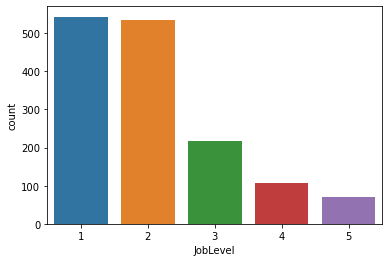

In [48]:
sns.countplot('JobLevel',data=attrition)

<AxesSubplot:xlabel='JobLevel'>

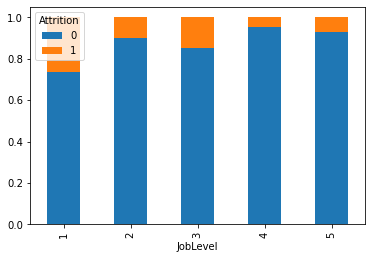

In [49]:
ct=pd.crosstab(attrition['JobLevel'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [50]:
print('1)Total:',attrition['JobLevel'].count(),'\n',attrition['JobLevel'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.JobLevel)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64 

2)table of joint proportion
 JobLevel     1    2    3    4   5
Attrition                        
0          400  482  186  101  64
1          143   52   32    5   5 

3)conditional probability conditioned on columns 
 JobLevel          1         2         3        4         5
Attrition                                                 
0          0.736648  0.902622  0.853211  0.95283  0.927536
1          0.263352  0.097378  0.146789  0.04717  0.072464 

4)conditional probability conditioned on rows 
 JobLevel          1         2         3         4         5
Attrition                                                  
0          0.324412  0.390916  0.150852  0.081914  0.051906
1          0.603376  0.219409  0.135021  0.021097  0.021097


-From bar plot we can observe that most employees are in lower job level.  
-Employees who are in lower job level has a highest probability of leaving.   


### 12) JobSatisfaction

In [51]:
attrition[['Attrition','JobSatisfaction']].groupby(['Attrition']).describe()

JobSatisfaction                                             
                    count      mean       std  min  25%  50%  75%  max
Attrition                                                             
0                  1233.0  2.778589  1.093277  1.0  2.0  3.0  4.0  4.0
1                   237.0  2.468354  1.118058  1.0  1.0  3.0  3.0  4.0

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

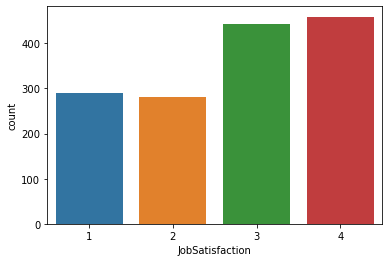

In [52]:
sns.countplot('JobSatisfaction',data=attrition)

<AxesSubplot:xlabel='JobSatisfaction'>

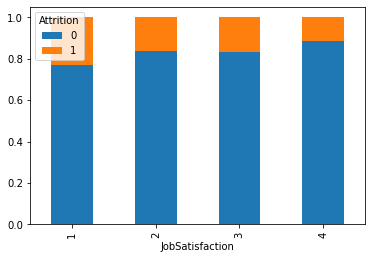

In [53]:
ct=pd.crosstab(attrition['JobSatisfaction'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [54]:
print('1)Total:',attrition['JobSatisfaction'].count(),'\n',attrition['JobSatisfaction'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.JobSatisfaction)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64 

2)table of joint proportion
 JobSatisfaction    1    2    3    4
Attrition                          
0                223  234  369  407
1                 66   46   73   52 

3)conditional probability conditioned on columns 
 JobSatisfaction         1         2         3        4
Attrition                                             
0                0.771626  0.835714  0.834842  0.88671
1                0.228374  0.164286  0.165158  0.11329 

4)conditional probability conditioned on rows 
 JobSatisfaction         1         2         3         4
Attrition                                              
0                0.180860  0.189781  0.299270  0.330089
1                0.278481  0.194093  0.308017  0.219409


-Around 60% of employees are having higher job satisfaction i.e., levels 3 and 4. Where as 40% of employees are having lower job satisfaction i.e., levels 1 and 2.   
-Employees who are having job satisfaction of 1 are having slightly higher probability of leaving company.  

### 13) WorkLifeBalance

In [55]:
attrition[['Attrition','WorkLifeBalance']].groupby(['Attrition']).describe()

WorkLifeBalance                                             
                    count      mean       std  min  25%  50%  75%  max
Attrition                                                             
0                  1233.0  2.781022  0.681907  1.0  2.0  3.0  3.0  4.0
1                   237.0  2.658228  0.816453  1.0  2.0  3.0  3.0  4.0

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

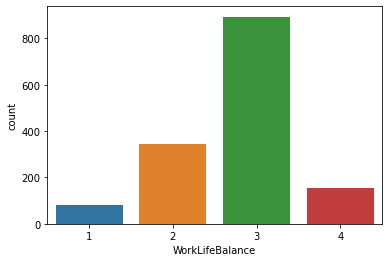

In [56]:
sns.countplot('WorkLifeBalance',data=attrition)

<AxesSubplot:xlabel='WorkLifeBalance'>

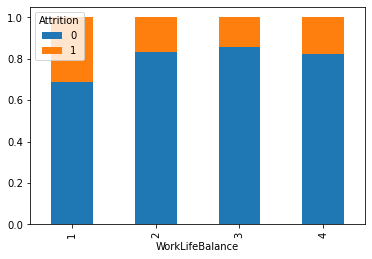

In [57]:
ct=pd.crosstab(attrition['WorkLifeBalance'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [58]:
print('1)Total:',attrition['WorkLifeBalance'].count(),'\n',attrition['WorkLifeBalance'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.WorkLifeBalance)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64 

2)table of joint proportion
 WorkLifeBalance   1    2    3    4
Attrition                         
0                55  286  766  126
1                25   58  127   27 

3)conditional probability conditioned on columns 
 WorkLifeBalance       1         2         3         4
Attrition                                            
0                0.6875  0.831395  0.857783  0.823529
1                0.3125  0.168605  0.142217  0.176471 

4)conditional probability conditioned on rows 
 WorkLifeBalance         1         2         3         4
Attrition                                              
0                0.044607  0.231955  0.621249  0.102190
1                0.105485  0.244726  0.535865  0.113924


-Most of the employees having above average worklifebalance so it implies very less employees are having bad worklifebalance.   
-If the worklifebalance is 1 the probability of leaving the company is higher. Where as for worklifebalance 2,3,4 the probability of leaving the company is lower.  


### 14) BusinessTravel

In [59]:
attrition[['Attrition','BusinessTravel']].groupby(['Attrition']).describe()

BusinessTravel                           
                   count unique            top freq
Attrition                                          
0                   1233      3  Travel_Rarely  887
1                    237      3  Travel_Rarely  156

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

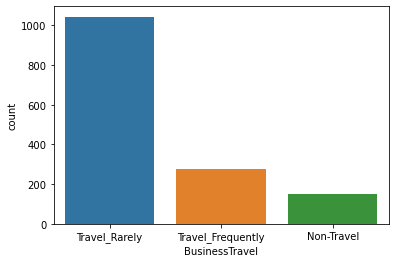

In [60]:
sns.countplot('BusinessTravel',data=attrition)

<AxesSubplot:xlabel='BusinessTravel'>

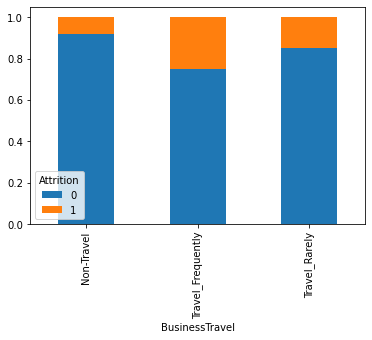

In [61]:
ct=pd.crosstab(attrition['BusinessTravel'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [62]:
print('1)Total:',attrition['BusinessTravel'].count(),'\n',attrition['BusinessTravel'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.BusinessTravel)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

2)table of joint proportion
 BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      138                208            887
1                       12                 69            156 

3)conditional probability conditioned on columns 
 BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569 

4)conditional probability conditioned on rows 
 BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                 0.111922           0.168694       0.719384
1                 0.050633           0.291139       0.658228


-Most of the employees rarely travel.  
-Around 1/4th of employees travel frequently.  
-Out of the employees who travel frequently have significantly higher probability of leaving.  

### 15) Department

In [63]:
attrition[['Attrition','Department']].groupby(['Attrition']).describe()

Department                                    
               count unique                     top freq
Attrition                                               
0               1233      3  Research & Development  828
1                237      3  Research & Development  133

<AxesSubplot:xlabel='Department', ylabel='count'>

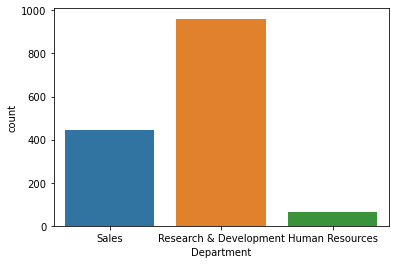

In [64]:
sns.countplot('Department',data=attrition)

<AxesSubplot:xlabel='Department'>

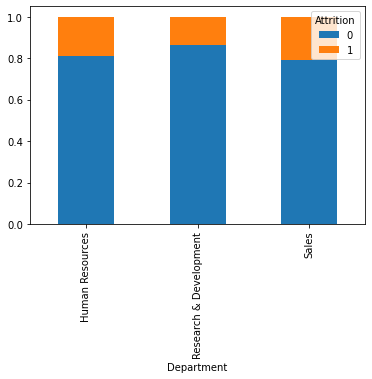

In [65]:
ct=pd.crosstab(attrition['Department'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [66]:
print('1)Total:',attrition['Department'].count(),'\n',attrition['Department'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.Department)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

2)table of joint proportion
 Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92 

3)conditional probability conditioned on columns 
 Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.809524                0.861602  0.793722
1                  0.190476                0.138398  0.206278 

4)conditional probability conditioned on rows 
 Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.041363                0.671533  0.287105
1                  0.050633                0.561181  0.3881

-Most of the employees in the company worked in the R&D Department.  
-The probability of the employees leaving the company from the department HR,R&D and sales are 0.19,0.13 and 0.20 respectively. While the employees from HR & sales are having slightly higher probability of leaving the company but it is not significant enough.  

### 16) EducationField

In [67]:
attrition[['Attrition','EducationField']].groupby(['Attrition']).describe()

EducationField                           
                   count unique            top freq
Attrition                                          
0                   1233      6  Life Sciences  517
1                    237      6  Life Sciences   89

<AxesSubplot:xlabel='EducationField', ylabel='count'>

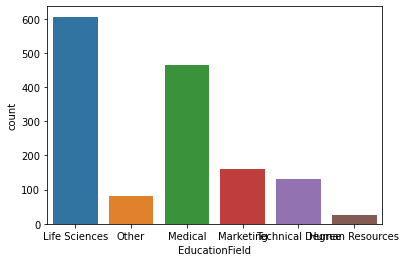

In [68]:
sns.countplot('EducationField',data=attrition)

<AxesSubplot:xlabel='EducationField'>

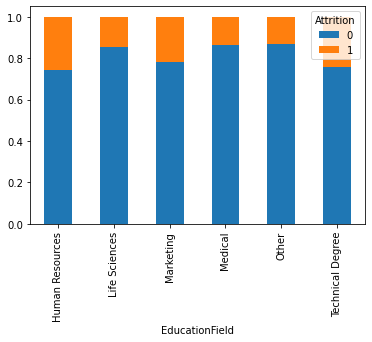

In [69]:
ct=pd.crosstab(attrition['EducationField'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [70]:
print('1)Total:',attrition['EducationField'].count(),'\n',attrition['EducationField'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.EducationField)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

2)table of joint proportion
 EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
0                            20            517        124      401     71   
1                             7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
0                            100  
1                             32   

3)conditional probability conditioned on columns 
 EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
0                      0.740741       0.853135   0.779874  0.864224  0.865854   
1                      0.2592

-Most of the employees are from Life Sciences and Medical.  
-We can observe that employees from HR and Tech Degree are having relatively higher probability of leaving the company compare to other department.  

### 17) Gender

In [71]:
attrition[['Attrition','Gender']].groupby(['Attrition']).describe()

Gender                  
           count unique   top freq
Attrition                         
0           1233      2  Male  732
1            237      2  Male  150

<AxesSubplot:xlabel='Gender', ylabel='count'>

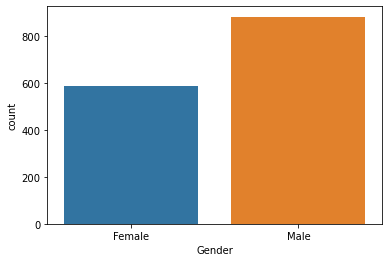

In [72]:
sns.countplot('Gender',data=attrition)

<AxesSubplot:xlabel='Gender'>

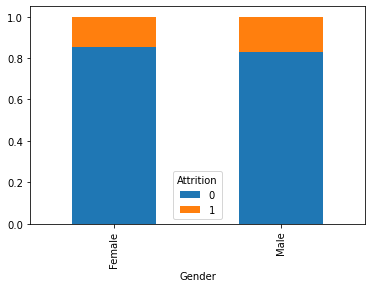

In [73]:
ct=pd.crosstab(attrition['Gender'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [74]:
print('1)Total:',attrition['Gender'].count(),'\n',attrition['Gender'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.Gender)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Male      882
Female    588
Name: Gender, dtype: int64 

2)table of joint proportion
 Gender     Female  Male
Attrition              
0             501   732
1              87   150 

3)conditional probability conditioned on columns 
 Gender       Female      Male
Attrition                    
0          0.852041  0.829932
1          0.147959  0.170068 

4)conditional probability conditioned on rows 
 Gender       Female      Male
Attrition                    
0          0.406326  0.593674
1          0.367089  0.632911


-There are more male compared to female in this company probability of attrition given male/female is 0.17/0.14.So, being a particular gender doesnot really affect the attrition much(Male has slightly higher chance of leaving but its not significant enough).  

### 18) MaritalStatus

In [75]:
attrition[['Attrition','MaritalStatus']].groupby(['Attrition']).describe()

MaritalStatus                     
                  count unique      top freq
Attrition                                   
0                  1233      3  Married  589
1                   237      3   Single  120

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

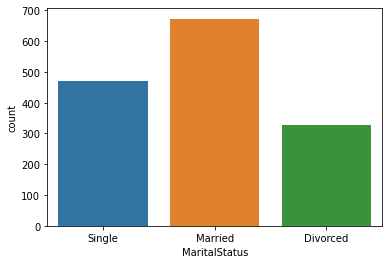

In [76]:
sns.countplot('MaritalStatus',data=attrition)

<AxesSubplot:xlabel='MaritalStatus'>

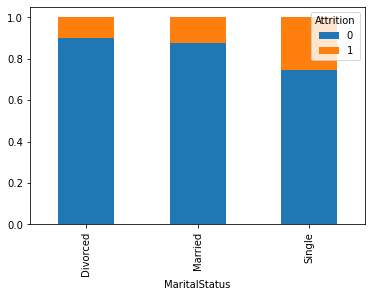

In [77]:
ct=pd.crosstab(attrition['MaritalStatus'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [78]:
print('1)Total:',attrition['MaritalStatus'].count(),'\n',attrition['MaritalStatus'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns = attrition.MaritalStatus)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

2)table of joint proportion
 MaritalStatus  Divorced  Married  Single
Attrition                               
0                   294      589     350
1                    33       84     120 

3)conditional probability conditioned on columns 
 MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.899083  0.875186  0.744681
1              0.100917  0.124814  0.255319 

4)conditional probability conditioned on rows 
 MaritalStatus  Divorced   Married    Single
Attrition                                  
0              0.238443  0.477697  0.283861
1              0.139241  0.354430  0.506329


-Most of the employees in the company are married.  
-Single employees are having higher probability of leaving the company. Where as Divorced and Married employees probably less.

### 19) OverTime

In [79]:
attrition[['Attrition','OverTime']].groupby(['Attrition']).describe()

OverTime                 
             count unique  top freq
Attrition                          
0             1233      2   No  944
1              237      2  Yes  127

<AxesSubplot:xlabel='OverTime', ylabel='count'>

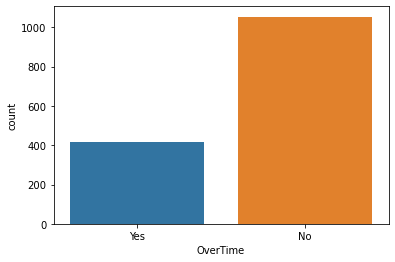

In [80]:
sns.countplot('OverTime',data=attrition)

<AxesSubplot:xlabel='OverTime'>

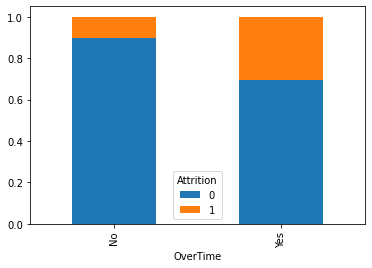

In [81]:
ct=pd.crosstab(attrition['OverTime'],attrition['Attrition'], normalize='index')
ct.plot.bar(stacked=True)

In [82]:
print('1)Total:',attrition['OverTime'].count(),'\n',attrition['OverTime'].value_counts(),'\n')
table = pd.crosstab(attrition.Attrition,columns= attrition.OverTime)
print('2)table of joint proportion\n',table,'\n')
coltotal = table.sum(axis = 0)
print('3)conditional probability conditioned on columns \n',table.div(coltotal,axis = 1),'\n')
rowtotal = table.sum(axis=1)
print('4)conditional probability conditioned on rows \n',table.div(rowtotal,axis = 0))

1)Total: 1470 
 No     1054
Yes     416
Name: OverTime, dtype: int64 

2)table of joint proportion
 OverTime    No  Yes
Attrition          
0          944  289
1          110  127 

3)conditional probability conditioned on columns 
 OverTime         No       Yes
Attrition                    
0          0.895636  0.694712
1          0.104364  0.305288 

4)conditional probability conditioned on rows 
 OverTime         No       Yes
Attrition                    
0          0.765612  0.234388
1          0.464135  0.535865


-We can observe that 1470 employees only 416 employees work overtime.  
-If a person works overtime he has probability of leaving whereas if he doesn't work overtime there is a lesser probability.

### From the above factors lets pick few factors that seem to affect the attrition the most

- Marital status
- Business travel
- Overtime
- Job involvement
- Job level
- Age   
- Monthly Income    
- Total Working Years   


## Exploring Multivariate Analysis on the existing variables against attrition.

### Note:

To get better result,we can use T-test and chi-square test between the target and independent attributes.